In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('/content/bitcoin_data_2014_to_2025.csv')
print(data.shape)
print(data.info)
print(data.describe)
print(data.dtypes)


(4095, 6)
<bound method DataFrame.info of             Date         Close          High           Low          Open  \
0     2014-09-17    457.334015    468.174011    452.421997    465.864014   
1     2014-09-18    424.440002    456.859985    413.104004    456.859985   
2     2014-09-19    394.795990    427.834991    384.532013    424.102997   
3     2014-09-20    408.903992    423.295990    389.882996    394.673004   
4     2014-09-21    398.821014    412.425995    393.181000    408.084991   
...          ...           ...           ...           ...           ...   
4090  2025-11-28  90919.265625  92969.085938  90257.117188  91285.382812   
4091  2025-11-29  90851.757812  91187.617188  90260.187500  90918.742188   
4092  2025-11-30  90394.312500  91965.046875  90394.312500  90838.210938   
4093  2025-12-01  86321.570312  90398.156250  83862.250000  90389.109375   
4094  2025-12-02  87785.914062  87785.914062  86223.601562  86306.093750   

           Volume  
0        21056800  
1    

In [6]:
data=data.drop(columns=['High', 'Low', 'Open', 'Volume'])
print(data.head())
print(data.tail())

         Date       Close
0  2014-09-17  457.334015
1  2014-09-18  424.440002
2  2014-09-19  394.795990
3  2014-09-20  408.903992
4  2014-09-21  398.821014
            Date         Close
4090  2025-11-28  90919.265625
4091  2025-11-29  90851.757812
4092  2025-11-30  90394.312500
4093  2025-12-01  86321.570312
4094  2025-12-02  87785.914062


In [7]:
df=data.copy()
df=df.rename(columns={'Date':'ds',"Close":"y"})
df.columns

Index(['ds', 'y'], dtype='object')

In [8]:
df["ds"]=pd.to_datetime(df["ds"])
df=df.sort_values("ds").reset_index(drop=True)

In [9]:
df.dtypes

,0
ds,datetime64[ns]
y,float64


In [12]:
len(df['ds'].unique())

4095

In [23]:
#train test split
series=df["y"]
# test_fraction=0.2
# split_idx=int(len(series)*0.8)

# train_series=series.iloc[:split_idx]
# test_series=series.iloc[split_idx:]

In [16]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.7 MB/s eta 0:00:00


In [24]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')
stepwise=auto_arima(
    series,
    start_p=0,start_q=0,
    max_p=6,max_q=6,
    seasonal=False,
    d=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    random_state=42
)

order=stepwise.order
print('p,d,q : ',order)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=68945.537, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=68940.499, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=68940.576, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=68945.083, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=68942.432, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=68942.456, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=68944.430, Time=0.96 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=68940.176, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=68942.095, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=68942.112, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=68940.254, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=68944.091, Time=0.39 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.409 seconds
p,d,q :  (1, 1, 0)


In [18]:
!pip install statsmodels

In [25]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(series, order=order,
            enforce_stationarity=False,
            enforce_invertibility=False)
res=model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4095
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -34460.168
Date:                Fri, 05 Dec 2025   AIC                          68924.337
Time:                        11:27:00   BIC                          68936.971
Sample:                             0   HQIC                         68928.810
                               - 4095                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0411      0.008     -4.994      0.000      -0.057      -0.025
sigma2      1.203e+06   1.05e+04    114.567      0.000    1.18e+06    1.22e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [26]:
start = series.index[0]
end = series.index[-1]

pred = res.get_prediction(start=start, end=end)
y_pred = pred.predicted_mean
y_pred_ci = pred.conf_int()


In [21]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# EPS = 1e-9

# mae = mean_absolute_error(test_series, y_pred)
# rmse = np.sqrt(mean_squared_error(test_series, y_pred))
# mape = np.mean(np.abs((test_series - y_pred) / (test_series + EPS))) * 100

# print("MAE:", mae)
# print("RMSE:", rmse)
# print("MAPE:", mape)


MAE: 50728.033854166664
RMSE: 57601.78711913089
MAPE: 60.100723174625216


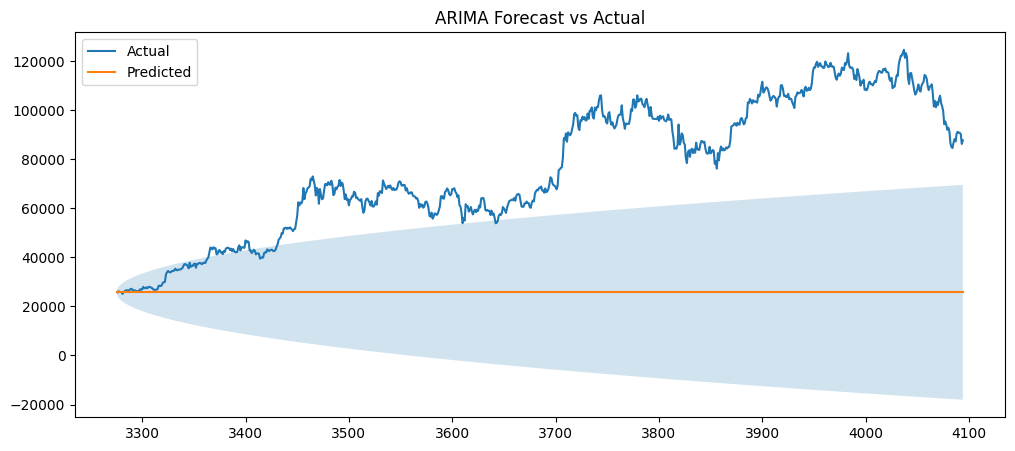

In [22]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,5))
# plt.plot(test_series.index, test_series, label='Actual')
# plt.plot(y_pred.index, y_pred, label='Predicted')
# plt.fill_between(y_pred.index, y_pred_ci.iloc[:,0], y_pred_ci.iloc[:,1], alpha=0.2)
# plt.legend()
# plt.title("ARIMA Forecast vs Actual")
# plt.show()


In [28]:
import pickle
with open("arima_model.pkl", "wb") as f:
    pickle.dump(res, f)


In [29]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ---------------------
# 1) Prepare series
# ---------------------
series = df["y"]

# last 60 days as test
N = 60
train_data = series.iloc[:-N]
test_data  = series.iloc[-N:]

print("Train size:", len(train_data))
print("Test size :", len(test_data))

# ---------------------
# 2) Find best (p,d,q) on train_data
# ---------------------
stepwise = auto_arima(
    train_data,
    start_p=0, start_q=0,
    max_p=6, max_q=6,
    seasonal=False,
    d=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    random_state=42
)

order = stepwise.order
print("Selected (p,d,q):", order)

# ---------------------
# 3) Fit ARIMA on train_data
# ---------------------
model = ARIMA(train_data, order=order,
              enforce_stationarity=False,
              enforce_invertibility=False)
res_ = model.fit()

# ---------------------
# 4) Predict next 60 days (test_window)
# ---------------------
start = test_data.index[0]
end   = test_data.index[-1]

pred_res = res_.get_prediction(start=start, end=end)
y_pred = pred_res.predicted_mean

# ---------------------
# 5) Accuracy metrics
# ---------------------
EPS = 1e-9
mae = mean_absolute_error(test_data, y_pred)
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
mape = np.mean(np.abs((test_data - y_pred) / (test_data + EPS))) * 100

print("\nBacktest Results (Last 60 Days):")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


Train size: 4035
Test size : 60
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=67686.324, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67675.856, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=67676.196, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=67687.570, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=67677.294, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=67677.373, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=67679.313, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=67677.477, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.464 seconds
Selected (p,d,q): (1, 1, 0)

Backtest Results (Last 60 Days):
MAE : 18406.09881667972
RMSE: 21356.46829579704
MAPE: 19.0732272332525
